In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import import_ipynb as ipynb
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from common import display_accuracy, sns_cm

In [2]:
%%capture
m_knn = ipynb.NotebookLoader().load_module('movements_knn')

In [3]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn,
                    param_grid=dict(n_neighbors=m_knn.k_range),
                    cv=m_knn.folds,
                    scoring='accuracy',
                    return_train_score=False)

# Normalisation

#### See lab part 2. Normalise the attributes using min-max-scaler. Redo the classification above with the four movement classes. Compare the results with the previous results you got from the preparations.

##### Is it needed using normalization for the decision tree classifier? Why or why not?


##### Is it needed using normalization for the KNN classifier? Why or why not?


#### Independent of you answer below we will evaluate the minmax-scaler for the KNN algorithm. You are free to use a pipeline for organising the steps.

##### Normalise the features so they all in the range from -1 to 1.

In [4]:
def scale(df):
    scaler = MinMaxScaler(feature_range=(-1, 1)).fit(df)
    return scaler.fit_transform(df)

In [5]:
X_train_scaled = scale(m_knn.X_train)
X_test_scaled = scale(m_knn.X_test)

In [6]:
X_test_sample_scaled = scale(m_knn.X_test_sample)

In [7]:
grid.fit(X=X_train_scaled, y=m_knn.y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

##### What is the optimal k-value?

In [8]:
grid.best_params_

{'n_neighbors': 3}

##### What is the accuracy?

In [9]:
grid.best_score_

0.9385309717522258

#### Now it is time to look at the test set with the optimal k-value

##### Use the model on the test set and acquire both the accuracy and the plot the confusion matrix.

In [10]:
y_scaled_pred_validation = grid.predict(X_test_scaled)

In [11]:
y_scaled_pred = grid.predict(X_test_sample_scaled)

##### Explain the difference between the accuracy for the validation set and the test set

In [12]:
display_accuracy(accuracy_score(m_knn.y_test, y_scaled_pred_validation),
                 accuracy_score(m_knn.y_true_sample, y_scaled_pred))

Validation set accuracy: 0.8846084282872129
Test set accuracy: 0.7923515052888527


##### Explain the result in the confusion matrix

##### Validation

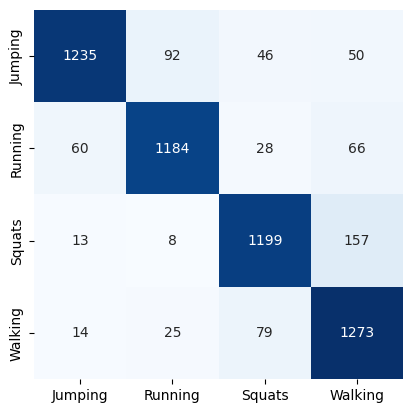

In [13]:
sns_cm(m_knn.y_test, y_scaled_pred_validation)

##### Test set

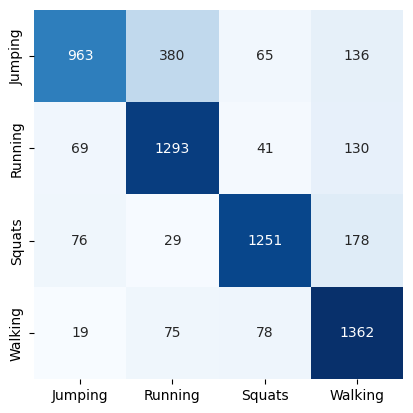

In [14]:
sns_cm(m_knn.y_true_sample, y_scaled_pred)

##### Plot the accuracy as a function of the k-value. You need to extract that information from the model. How sensitive is the performance of the model for different k-values?

<Axes: title={'center': 'Accuracy'}, xlabel='k'>

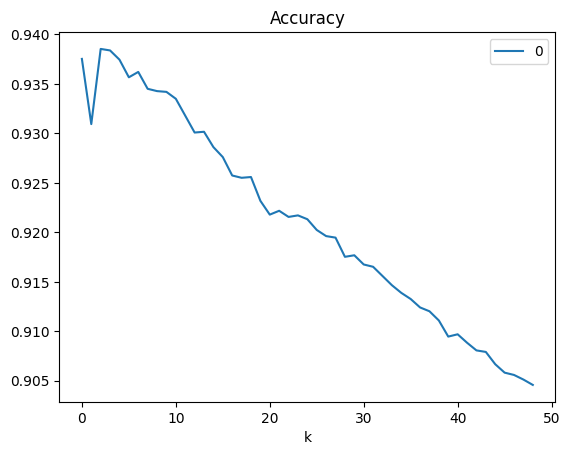

In [15]:
pd.DataFrame(grid.cv_results_['mean_test_score']).plot(title = 'Accuracy', xlabel='k')

##### Which one give the best result, KNN, KNN-normalised or Decision tree?
